In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

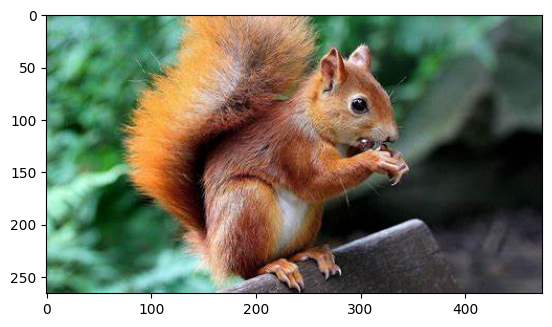

In [5]:
image = cv2.imread("../images/squirrel.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# blur 均值滤波

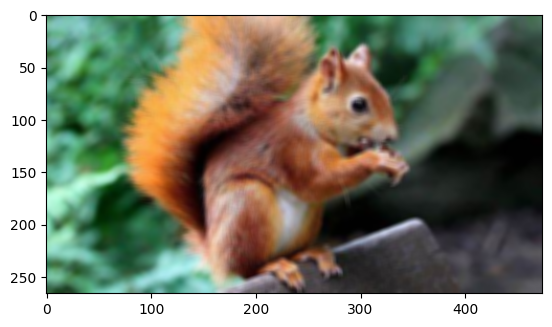

In [6]:
image_blur = cv2.blur(
    src=image,
    ksize=(5, 5),   # 核大小
)
plt.imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))

# medianBlur 中值滤波

对椒盐噪声有很好的抑制作用

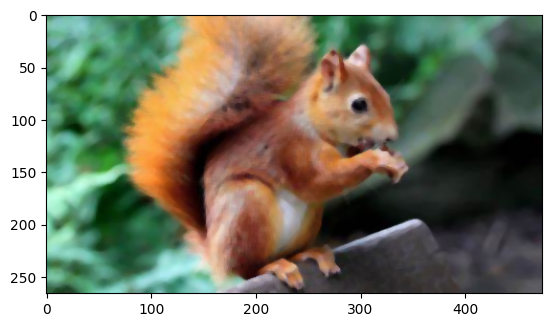

In [16]:
image_median_blur = cv2.medianBlur(
    src=image,
    ksize=5,    # 必须为奇数
)
plt.imshow(cv2.cvtColor(image_median_blur, cv2.COLOR_BGR2RGB))

# GaussianBlur 高斯滤波

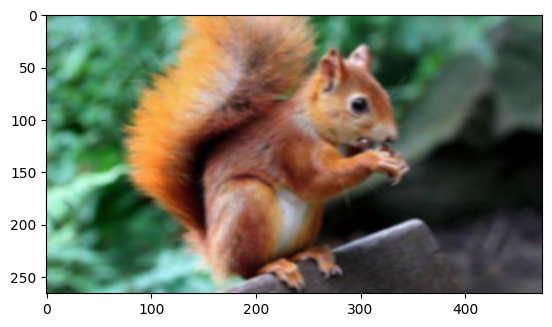

In [ ]:
image_gaussian_blur = cv2.GaussianBlur(
    src=image,
    ksize=(5, 5),   # 高斯滤波器模板大小,  x,y 必须是正数而且是奇数
    sigmaX=5,       # 横波的大小
    sigmaY=1,       # 纵波的大小
)
plt.imshow(cv2.cvtColor(image_gaussian_blur, cv2.COLOR_BGR2RGB))

# bilateralFilter 双边滤波

均值模糊无法克服边缘像素信息丢失缺陷。原因是均值滤波是基于平均权重

高斯模糊部分克服了该缺陷，但是无法完全避免，因为没有考虑像素值的不同

高斯双边模糊 – 是边缘保留的滤波方法，避免了边缘信息丢失，保留了图像轮廓不变


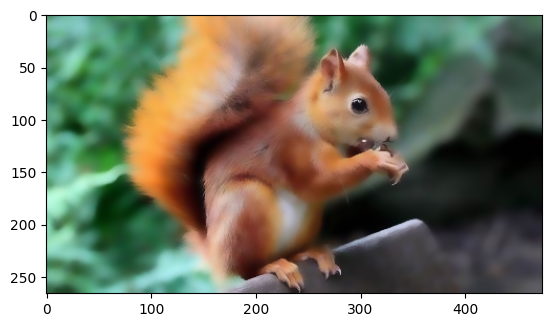

In [19]:
image_bilateral_filter = cv2.bilateralFilter(
    src=image,
    d=15,           # 计算的半径，半径之内的像数都会被纳入计算，如果提供-1 则根据sigma space参数取值
    sigmaColor=150, # 决定多少差值之内的像素会被计算
    sigmaSpace=3,   # 如果d的值大于0则声明无效，否则根据它来计算d值
)
plt.imshow(cv2.cvtColor(image_bilateral_filter, cv2.COLOR_BGR2RGB))

# boxFilter 方框滤波(类似卷积,默认参数都为1,可以理解为求均值)

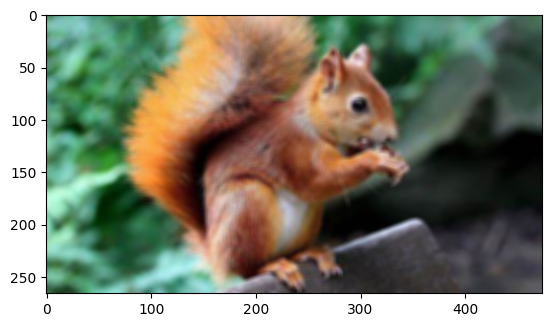

In [21]:
image_box_filter = cv2.boxFilter(
    src=image,
    ddepth=-1,      # ddepth是处理结果图像的图像深度,一般使用-1表示与原始图像使用相同的图像深度
    ksize=(5, 5),   # 滤波核的大小
    anchor=(-1, -1),# 锚点，其默认值是（-1,-1）
    normalize=1,    # 在滤波时是否进行归一化（这里指将计算结果规范化为当前像素值范围内的值）处理，该参数是一个逻辑值，可能为真（值为1）或假（值为0）：
                    #   1.当参数normalize=1时，表示要进行归一化处理，要用邻域像素值的和除以面积。此时方框滤波与均值滤波效果相同。
                    #   2.当参数normalize=0时，表示不需要进行归一化处理，直接使用邻域像素值的和。当 normalize=0时，因为不进行归一化处理，因此滤波得到的值很可能超过当前像素值范围的最大值，从而被截断为最大值。这样，就会得到一幅纯白色的图像
    borderType=1,   # 边界样式
)
plt.imshow(cv2.cvtColor(image_box_filter, cv2.COLOR_BGR2RGB))